# Image Pre-Processing


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


images = np.load('small_rld.npy')

fig, ax = plt.subplots(10, 12, figsize=(10,10))

count = 0
for i in range(10):
    for j in range(12):
        ax[i][j].imshow(images[count])
        count += 1

fig2, ax2 = plt.subplots(1,1, figsize=(10,10))
ax2.imshow(images[60])
ax2.set_title('Example Image: 60, Brown Spot')

plt.show
        


<function matplotlib.pyplot.show(*args, **kw)>

228864
(120, 149, 512)
uint8


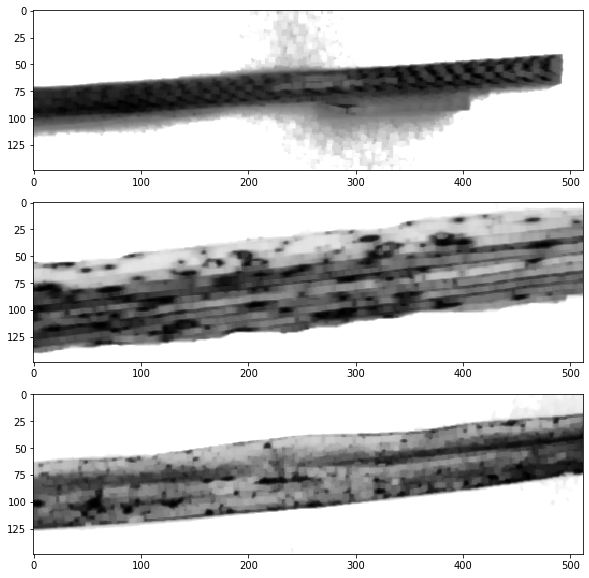

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def CloseHoles(images):
    
    kernel = np.ones((2,2))
    
    morphed = []
    
    #Opening: Erosion followed by Dialation
    for img in images:
        morphimg = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
        morphed.append(morphimg)
        
    morphed = np.asarray(morphed)
    return morphed

def RemoveNoise(images):
    kernel = np.ones((4,4))
    
    morphed = []
    
    #Opening: Dialation followed by Erosion
    for img in images:
        morphimg = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
        morphed.append(morphimg)
        
    morphed = np.asarray(morphed)
    return morphed
    
    
        

def WatershedAlgorithm(images):
    
    images = RemoveNoise(images)
    images = CloseHoles(images)
    
    
    
    
    
    

    
    return images

def AdaptedThreshold(images):
    mask = []
    
    
    for img in images:
        maskimg = cv2.adaptiveThreshold(img, 250, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 2)

        mask.append(maskimg)
    mask = np.asarray(mask)
    return mask

def SimpleThreshold(images):
    mask = []
    
    for img in images:
        #threshhold_val, maskimg = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        threshhold_val, maskimg = cv2.threshold(img, 0, 230,cv2.THRESH_TRUNC 
 + cv2.THRESH_OTSU)

        mask.append(maskimg)
    mask = np.asarray(mask)
    return mask

def getSize(images):
    print('SHAPE\n:')
    print(images.shape)
    print(images.dtype)
    

def RGBtoBGRtoGRAY(images):
    
    BGR = []
    
    for img in images:
        BGRimg = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        BGR.append(BGRimg)
    
    BGR = np.asarray(BGR)
    print(BGR[0].size)
    
    gray = []
    
    for img in BGR:
        grayimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray.append(grayimg)
    

    gray = np.asarray(gray)
    return gray
    


def HistEqualization(images):
    
    equalized = []
    
    print(images.shape)
    print(images[0].dtype)
    
    for img in images:
        equalized_img = cv2.equalizeHist(img.astype('uint8'))
        equalized.append(equalized_img)
    
    np.asarray(equalized)
    return equalized


def ContrastBrightness(images):
        adjusted = np.array(images.shape, images.dtype)
        
        #CONTRAST
        alpha = 2.0
        #BRIGHTNESS
        beta =-50
        
        adjusted = cv2.addWeighted(images, alpha, np.ones(images.shape, images.dtype), beta, 0)
        return adjusted
                    

def GBlur(images):
    #Initializes empty array
    gblur_images = []
    
    for image in images:
        p_img = cv2.GaussianBlur(image, (9,9), 1)
        gblur_images.append(p_img)
        
    gblur_images = np.asarray(gblur_images)
    return gblur_images

def Plot(images):
    
    fig, ax = plt.subplots(3,1, figsize=(10,10))
    ax[0].imshow(images[0], cmap='gray')
    ax[1].imshow(images[41], cmap='gray')
    ax[2].imshow(images[82], cmap='gray')
    plt.show()
    
    #Dimensions for 3 Channel Color
    #plot_images = images.reshape((10,12,149,512,3))
    
    #Dimensions for 1 Channel color (Gray)
    #plot_images = images.reshape((10,12,149,512))
    
    #figall, axall = plt.subplots(10,12,figsize=(10,10))
    
    #for i in range(10):
    #    for j in range(12):
    #        axall[i][j].imshow(plot_images[i][j])
    #plt.show(figall)
    
    
def PreProcess(images):
    proccesed_images = RGBtoBGRtoGRAY(images)
        
    proccesed_images = HistEqualization(proccesed_images)
    
    proccesed_images = GBlur(proccesed_images)
    
    proccesed_images = SimpleThreshold(proccesed_images)
    
    proccesed_images = WatershedAlgorithm(proccesed_images)
    
    return proccesed_images

def main():
    images = np.load('small_rld.npy')
    #print(images.shape)
    processed_images = PreProcess(images)
    #getSize(processed_images)
    Plot(processed_images)


main()
